In [1]:
import pickle
import numpy as np
import pandas as pd
from datetime import datetime, timedelta, date

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sys
sys.path.append('../')
from axia import report

from importlib import reload

# Load Subscription Data

In [3]:
with open("./jobber_working_data.pkl", "rb") as f:
    data = pickle.load(f)

In [7]:
data.df.head()

,start_date,end_date,age,alive,subscription_initial,subscription_last,subscription_current,frequency,country,industry
account_id,,,,,,,,,,
2,2011-04-01,NaT,95,1,65.0,128.0,128.0,monthly,canada,painting
34,2012-04-01,NaT,83,1,47.0,47.0,47.0,monthly,canada,arborist_/_tree_care
87,2014-04-01,2015-02-01,10,0,39.0,39.0,0.0,monthly,united_states,lawn_care_&_lawn_maintenance
109,2011-05-01,NaT,94,1,38.0,47.0,47.0,monthly,canada,painting
137,2016-03-01,2016-08-01,5,0,68.0,68.0,0.0,monthly,united_states,mechanical_service


# Overview

In [15]:
rep = report.ReportActuals(subscription_data=data)

In [16]:
rep.observed_ltv()

,alive,subscription_value_base,value_to_date_base,subscription_value_linear,value_to_date_linear
mean,0.714984,53.84156,747.146044,55.860684,759.640444
10%,0.000000,0.00000,177.000000,0.000000,179.000000
50%,1.000000,49.00000,684.000000,53.000000,682.595745
90%,1.000000,114.00000,1392.000000,121.087586,1404.545289


In [17]:
rep.observed_ltv(start_date_cutoff="2015-01-01")

,alive,subscription_value_base,value_to_date_base,subscription_value_linear,value_to_date_linear
mean,0.708254,58.937667,819.110179,61.129221,832.515606
10%,0.000000,0.000000,180.200000,0.000000,189.100000
50%,1.000000,59.000000,757.500000,60.666667,768.000000
90%,1.000000,129.000000,1548.000000,129.000000,1548.000000


## Cohort Analysis

It seems value to date is growing when older data is dismissed, let's look at these values broken down by cohort to have a better idea of what's going on. 

In [22]:
rep.observed_ltv_by_cohort().loc["2017-09-01":, ["alive", "mean_subscription_value_base", "mean_value_to_date_base"]]

,alive,mean_subscription_value_base,mean_value_to_date_base
start_date,,,
2017-09-01,0.700405,70.489879,975.983806
2017-10-01,0.708904,74.681507,1047.431507
2017-11-01,0.707143,81.035714,1091.710714
2017-12-01,0.706140,95.723684,1325.513158
2018-01-01,0.698006,89.236467,1247.247863
2018-02-01,0.681818,91.144385,1274.903743
2018-03-01,0.658879,89.894860,1277.939252


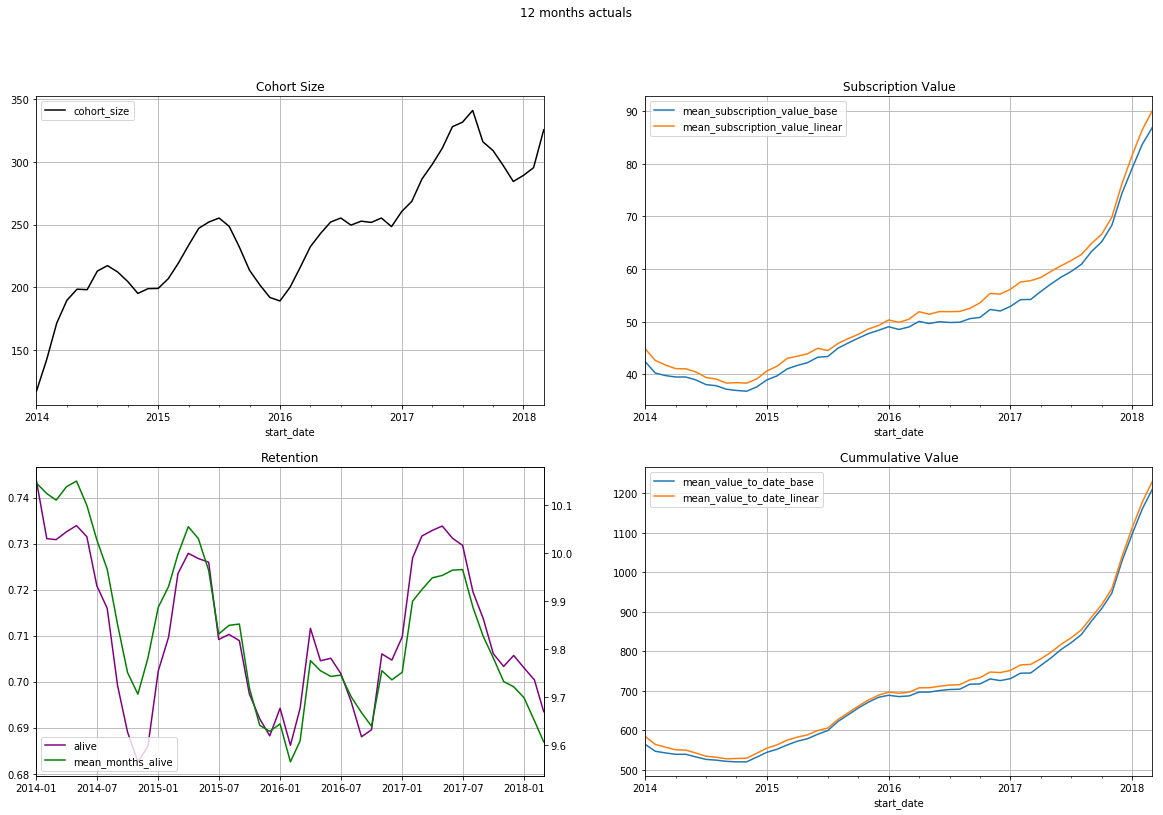

In [18]:
rep.plot_cohort_trends(start_date_cutoff="2014-01-01", smoothing=6);